Dana Rozenblum & Efrat Magidov
# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [6]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Load data

In [7]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

You can see details and metadata here, including the meaning of features:
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [8]:
raw_data = load_wine()
print(raw_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.

Q1: Do you agree? Explain your answer

**Answer:** The statement is correct: if we perform PCA and maintain all principal components, we keep all the data and all the features. 

# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [11]:
X_train.shape

(106, 13)

In [21]:
clf = RandomForestClassifier(random_state=222)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Random Forest is %.2f%%" %(accuracy_score(y_pred, y_test)*100))

Accuracy of Random Forest is 97.22%


Task 2: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [237]:
# scale the data
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(X_train)
X_train_centered = scaler.transform(X_train)
X_test_centered = scaler.transform(X_test)

# PCA
pca = PCA() # keep all components
pca.fit(X_train_centered)
TRAIN= pca.transform(X_train_centered)
TEST = pca.transform(X_test_centered)

# Random Forest
clf = RandomForestClassifier(random_state=222)
clf.fit(TRAIN, y_train)
y_pred2 = clf.predict(TEST)
print("Accuracy of PCA + Random Forest is %.2f%%" %(accuracy_score(y_pred2, y_test)*100))

Accuracy of PCA + Random Forest is 94.44%


Q2: By applying PCA, did random forest's results improved\stayed the same\got worse? 

**Answer:** Adding PCA made the random forest's results worse. This is because PCA changes the values of the data - it transforms the data and projects it into a new dimension without any consideration of the labels. Since the desicion boundaries of a desicion tree are rectilinear, i.e parallel to the coordinate axes, some samples' labels may be wrongly classified given their new location in space.


# PCA + logistic regression

Task 3: repeat task 1 with logistic regression.


In [49]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)
y_pred3 = logreg.predict(X_test)
print("Accuracy of Logistic Regression is %.2f%%" %(accuracy_score(y_pred3, y_test)*100))

Accuracy of Logistic Regression is 94.44%



Task 4: repeast task 2 with logistic regression.

In [33]:
logreg = LogisticRegression()
logreg.fit(TRAIN, y_train)
y_pred4 = logreg.predict(TEST)
print("Accuracy of PCA + Logistic Regression is %.2f%%" %(accuracy_score(y_pred4, y_test)*100))

Accuracy of PCA + Logistic Regression is 98.61%


*Q3*: By applying PCA, Did linear regression results improved\stayed the same\got worse?

**Answer:** Applying PCA improved the performance of the logistic regression. Mean normalization is good when there is a huge variance in the feature values, as is the case in this dataset, and also for modeling negative vs positive effects of the features on the class. Moreover PCA improved the running time (the deafult number of iterations was sufficient for convergence).

Q4: Explain the differences between answers to Q2 and Q3. 

**Answer:** The data projection performed by PCA (when keeping all the data) is benefitial to models like logistic regression that are not limited in their formed desicion boundaries, but is harmful for models like random forest with rectilinear desicion boundaries. 

Finding the optimal number of compoenets:

You team decided that you must compress the data and PCA was selected. However, you are not sure how many principals components to have. Implemented the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Linear regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing



In [222]:
def choose_PCA_componentes(X_train, y_train, X_test, y_test,
                           min_explained_variance=None, 
                           keep_only_above_avg=False):
    
    # scale the data
    scaler = StandardScaler(with_mean=True,with_std=True)
    scaler.fit(X_train)
    X_train_centered = scaler.transform(X_train)
    X_test_centered = scaler.transform(X_test)

    # PCA
    pca = PCA() # keep all components
    pca.fit(X_train_centered)
    TRAIN= pca.transform(X_train_centered)
    TEST = pca.transform(X_test_centered)
    
    components_variance_array = pca.explained_variance_ratio_
    
    comps_to_take = []
    
    if min_explained_variance is not None:
        sum_var = 0
        for comp_ind, comp_var in enumerate(components_variance_array):
            if sum_var < min_explained_variance:
                sum_var += components_variance_array[comp_ind]
                comps_to_take.append(comp_ind)
            else:
                break
    
    if keep_only_above_avg:
        var_avg = components_variance_array.mean()
        comps_to_take = np.argwhere(components_variance_array > var_avg)
    
    return np.squeeze(np.asarray(comps_to_take))
        


In [223]:
# Keeping at least 50% of the variance with minimum number of components
choose_PCA_componentes(X_train, y_train, X_test, y_test, min_explained_variance=0.5)

array([0, 1])

In [409]:
# Keeping above average components only
choose_PCA_componentes(X_train, y_train, X_test, y_test, keep_only_above_avg=True)

array([0, 1, 2])

In [447]:
def coose_PCA_components_by_linreg_acc(X_train, y_train, X_test, y_test,
                                       acc_improved_by):       
    accuracy_scores = []
    comps_to_take = []
    
    for i in range(1, X_train.shape[1]+1):
        if i == 1: 
            prev_acc_score = 0
        else:
            prev_acc_score = acc_score
        pca_pipline = make_pipeline(StandardScaler(), PCA(n_components =i), LogisticRegression())
        pca_pipline.fit(X_train, y_train)
        y_pred = pca_pipline.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        print("when adding component %d the accuracy score is %.3f" %(i-1, acc_score))
        if acc_score - prev_acc_score > acc_improved_by:
            accuracy_scores.append(acc_score)
            comps_to_take.append(i-1)
        else:
            continue
    
    return np.asarray(comps_to_take)

In [448]:
# The number of componets which maximize the accuracy of Linear regression on the test set. 
# Components which improve the accuracy by less than 0.001 are not considered as contributing
coose_PCA_components_by_linreg_acc(X_train, y_train, X_test, y_test,  
                       acc_improved_by=0.001)

when adding component 0 the accuracy score is 0.861
when adding component 1 the accuracy score is 0.944
when adding component 2 the accuracy score is 0.931
when adding component 3 the accuracy score is 0.972
when adding component 4 the accuracy score is 0.972
when adding component 5 the accuracy score is 0.972
when adding component 6 the accuracy score is 0.986
when adding component 7 the accuracy score is 0.986
when adding component 8 the accuracy score is 0.986
when adding component 9 the accuracy score is 0.986
when adding component 10 the accuracy score is 0.986
when adding component 11 the accuracy score is 0.986
when adding component 12 the accuracy score is 0.986


array([0, 1, 3, 6])

# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 150 eigenfaces from 1288 faces


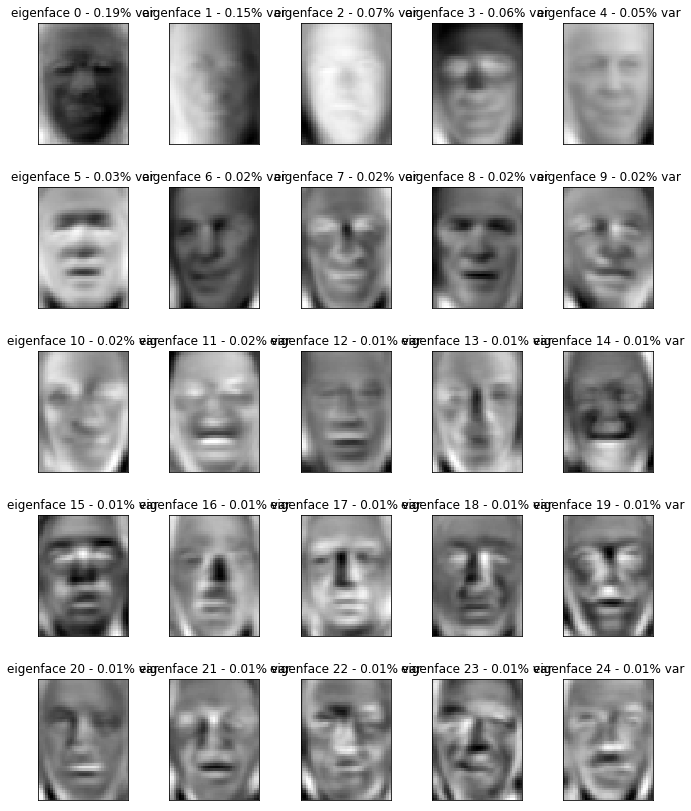

In [2]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)

Task 5: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images

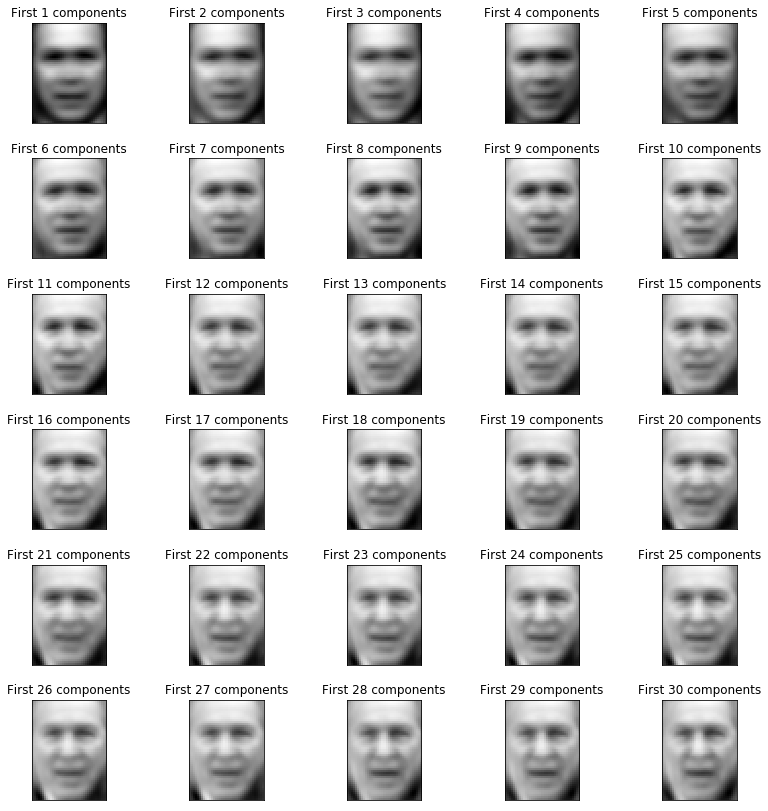

In [4]:
# For a specific image, see how adding PCs affect the reconstruction
pic_id = 10
pic = X[pic_id] # choose any arbitrary image
numPCs = 30
n_col = numPCs/5
n_row = 5

#plt.figure(figsize=(20,10))
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

for i in range(1, numPCs+1):
    ### Take the first i principal components
    comps = pca.components_[:i]

    ### Reduce the dimensionality of the image
    data_reduced = np.dot(X - pca.mean_, comps.T)

    ### Reconstruct the image to the original dimension
    approximation = np.dot(data_reduced,comps)+ pca.mean_

    ### Plot the image
    plt.subplot(n_col, n_row, i)
    plt.imshow(approximation[pic_id,:].reshape(h,w), cmap=plt.cm.gray)
    plt.title('First %d components' %i)
    plt.xticks(())
    plt.yticks(())

    # You are not allowed to refit the pca object
    # Hint: take a look at sklearn's PCA transform and inverse_transform implementation
plt.show()
